# **5. Scientific computing**

# Scipy
SciPy는 과학 계산에 자주 쓰이는 수학적 기능들을 제공하는 여러 패키지들의 모임이다.

서브 패키지들이 많지만 주로 다룰 패키지는


*   interpolate (보간)
*   optimize (최적화)
*   stats (통계)
*   integrate (적분)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# Interpolation (보간)
일정한 간격의 x와 y 데이터가 있을 때 중간값들을 보간하여 더 부드럽게 하거나 정확한 곡선을 만들어 내는 방법들 같음

In [ ]:
import scipy.interpolate as interp

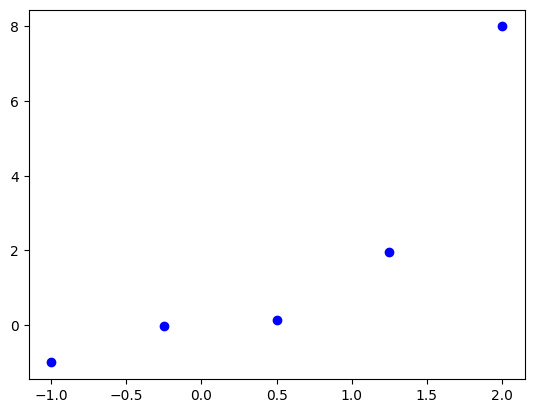

In [ ]:
# x = [-1, -0.25, 0.5, 1.25, 2.0]
x = np.linspace(-1,2,5);
y = x**3

# 파란 점으로 시각화
plt.plot(x,y,'bo')

In [ ]:
# interp1d 는 1차원 보간함수를 생성
# kind = 'linear' 는 선형 보간 방식을 사용
f = interp.interp1d(x,y,kind = 'linear')

In [ ]:
type(f)

scipy.interpolate._interpolate.interp1d

In [ ]:
# x = 0.2일 때 보간된 y 값을 구하는 것
f(0.2)

array(0.06875)

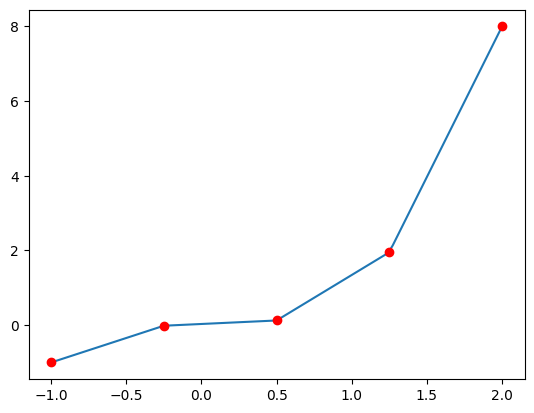

In [ ]:
x_fine = np.linspace(-1,2,100)
plt.plot(x_fine, f(x_fine))
plt.plot(x, y, 'ro')

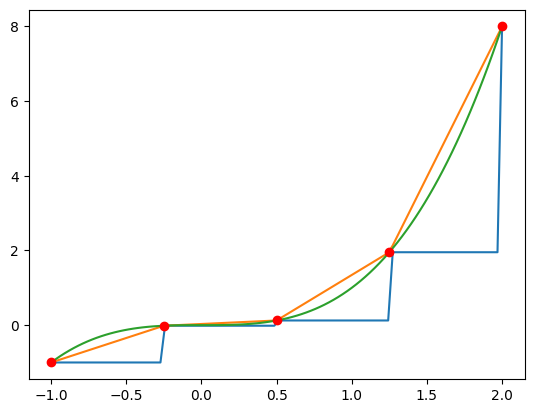

In [ ]:
# 계단형 보간(파랑)
plt.plot(x_fine, interp.interp1d(x,y,kind='zero')(x_fine))

# 선형 보간(주황)
plt.plot(x_fine, interp.interp1d(x,y, kind='linear')(x_fine))

# 3차 스플라인 보간(초록)
# 부드러운 곡선이 생성된 것 확인
plt.plot(x_fine, interp.interp1d(x,y, kind='cubic')(x_fine))

# 기존 점
plt.plot(x,y,'ro')

# Optimization (최적화)


In [ ]:
from scipy import optimize

In [ ]:
def f(x):
  return x**4 - 10*x**2

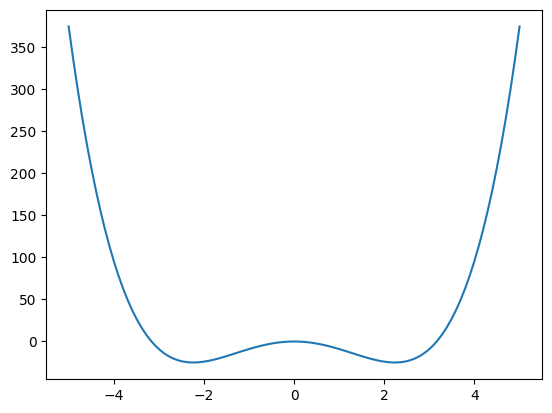

In [ ]:
x = np.linspace(-5,5,100)
plt.plot(x, f(x));

In [ ]:
# 최소값을 수치적으로 찾는 과정
results = optimize.minimize(f, 4)
results

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -24.99999999999999
        x: [ 2.236e+00]
      nit: 7
      jac: [ 1.431e-06]
 hess_inv: [[ 2.497e-02]]
     nfev: 16
     njev: 8

In [ ]:
x_opt = results.x

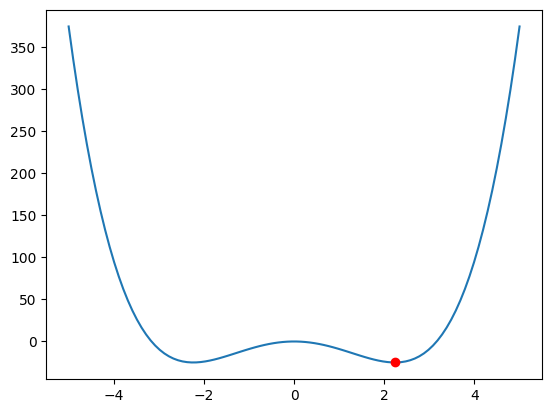

In [ ]:
# 최소값의 위치를 빨간점으로 표시
plt.plot(x, f(x))
plt.plot(x_opt, f(x_opt), 'ro');

local minima가 여러개인 경우

In [ ]:
# 입력이 2차원 형태임
# 최소값이 여러개 존재할 수 있을 것 같다.(local minima가 여러개 있는 경우)
def f(x):
  return x[0]*x[0] + x[1]*x[1] + 5*(np.sin(2*x[0]) + np.sin(2*x[1]))

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x,y)

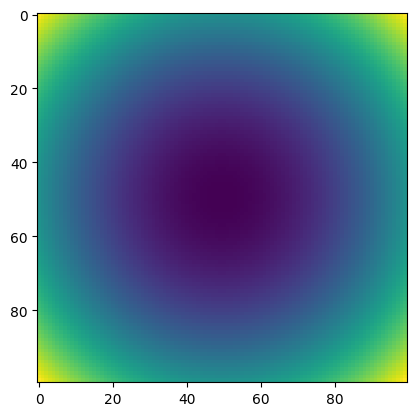

In [ ]:
plt.imshow(X**2+Y**2)

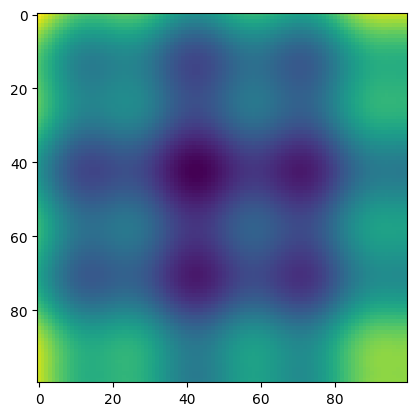

In [ ]:
plt.imshow(f(np.array([X,Y])))

- message : 수렴 메세지
- success : 최적화 성공여부
- status : 상태코드 0이면 됨
- fun : 최소값에서의 함수값
- x : 찾은 최적해
- nit : 반복횟수
- jac : Gradient
- hess_inv : 역 헤시안 근사 행렬
- nfev : 함수 f 계산 횟수
- njev : gradient 계산 횟수

In [ ]:
optimize.minimize(f, x0=[-1, 1])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -4.399749751160588
        x: [-7.138e-01  2.136e+00]
      nit: 9
      jac: [-5.960e-08  5.960e-08]
 hess_inv: [[ 4.597e-02 -6.403e-07]
            [-6.403e-07  4.980e-02]]
     nfev: 42
     njev: 14

In [ ]:
optimize.minimize(f, x0=[3, 3])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.07912876341590547
        x: [ 2.136e+00  2.136e+00]
      nit: 5
      jac: [-3.576e-07 -3.576e-07]
 hess_inv: [[ 5.249e-01 -4.751e-01]
            [-4.751e-01  5.249e-01]]
     nfev: 18
     njev: 6

In [ ]:
optimize.minimize(f, x0=[2, -2])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -4.399749751160329
        x: [ 2.136e+00 -7.138e-01]
      nit: 7
      jac: [-1.907e-06 -2.623e-06]
 hess_inv: [[ 4.954e-02 -2.732e-04]
            [-2.732e-04  4.569e-02]]
     nfev: 27
     njev: 9

In [ ]:
optimize.minimize(f, x0=[-3, 1])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.995248354745979
        x: [-3.534e+00  2.136e+00]
      nit: 9
      jac: [ 9.537e-07  1.431e-06]
 hess_inv: [[ 6.224e-02  4.179e-04]
            [ 4.179e-04  5.039e-02]]
     nfev: 33
     njev: 11

초기값에 따라서 다른 local minima에 수렴하는 것을 알 수 있다.

따라서 최적화에 성공했다고 해서 그게 좋은 최소값인지 보장 된다는 것은 아닌 것 같다.

따라서 초기값이 최적화 결과에 영향을 준다고 생각한다.

옵션을 다르게 하면 어떻게 최적화 될까

In [ ]:
optimize.minimize(f, x0=[-1, 1], method = 'BFGS')

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -4.399749751160588
        x: [-7.138e-01  2.136e+00]
      nit: 9
      jac: [-5.960e-08  5.960e-08]
 hess_inv: [[ 4.597e-02 -6.403e-07]
            [-6.403e-07  4.980e-02]]
     nfev: 42
     njev: 14

In [ ]:
optimize.minimize(f, x0=[-1, 1], method = 'Nelder-Mead')

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -4.399749742034779
             x: [-7.138e-01  2.136e+00]
           nit: 41
          nfev: 79
 final_simplex: (array([[-7.138e-01,  2.136e+00],
                       [-7.137e-01,  2.136e+00],
                       [-7.138e-01,  2.135e+00]]), array([-4.400e+00, -4.400e+00, -4.400e+00]))

In [ ]:
optimize.minimize(f, x0=[-1, 1], method = 'Powell')

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -4.399749751160578
       x: [-7.138e-01  2.136e+00]
     nit: 2
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 42

최적화도 성공적으로 종료되고 최솟값 또한 거의 동일하고 최솟값을 찾은 x또한 거의 동일하다.

하지만 nit(반복 횟수)가 다르고 nfev(함수 f를 계산한 횟수 또한 다르다)

따라서 같은 함수더라도 method에 따라 수렴 속도, 반복 횟수, 함수 호출 수가 크게 달라질 수있을 것 같다.

# Curve fitting

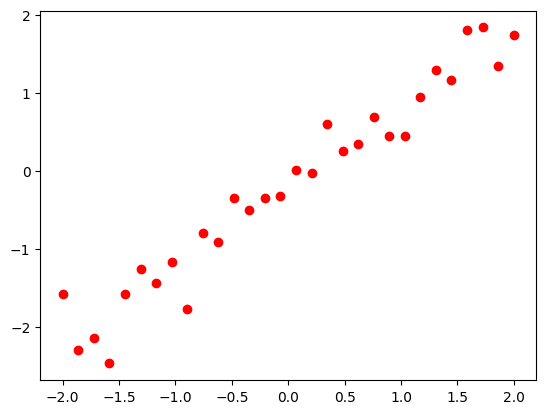

In [ ]:
# 무작위적인 데이터를 생성
x = np.linspace(-2, 2, 30)
y = x + np.sin(6, 5*x) + 0.3 * np.random.randn(30)
plt.plot(x, y, 'ro')

In [ ]:
# 선형(직선) 모델로 피팅
def f(x, a, b):
  return a*x + b

In [ ]:
# optimize.curve.fit이 자동으로 a, b를 추정
# (0,0)이 초기 추정값
((a,b),_) = optimize.curve_fit(f, x, y,(0,0))
a, b

(np.float64(1.015783514582195), np.float64(-0.19817104363818255))

In [ ]:
((a,b),_) = optimize.curve_fit(f, x, y,(3,3))
a, b

(np.float64(1.0157835141630007), np.float64(-0.1981710407525532))

In [ ]:
((a,b),_) = optimize.curve_fit(f, x, y,(-4,4))
a, b

(np.float64(1.0157835126851538), np.float64(-0.19817104272369424))

In [ ]:
optimize.curve_fit?

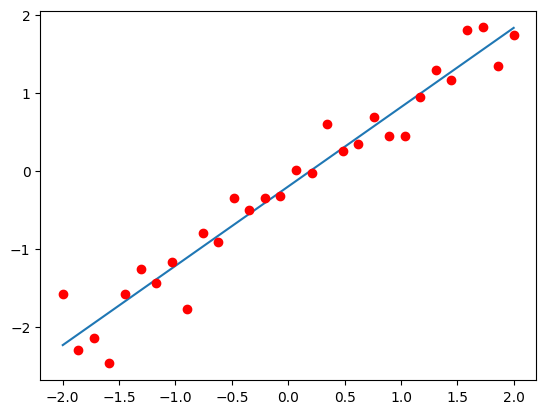

In [ ]:
# 추정한 a, b에 따른 곡선 시각화
x_fine = np.linspace(-2, 2, 200)
plt.plot(x_fine, f(x_fine, a, b))
plt.plot(x, y, 'ro')

In [ ]:
# sin함수가 포함된 비선형적인 모델로 피팅
def g(x, a, b):
  return a*x + b *np.sin(6.5*x)

In [ ]:
((a,b),_) = optimize.curve_fit(g,x,y,(0,0))
a, b

(np.float64(1.0082378505306564), np.float64(-0.11609507830356312))

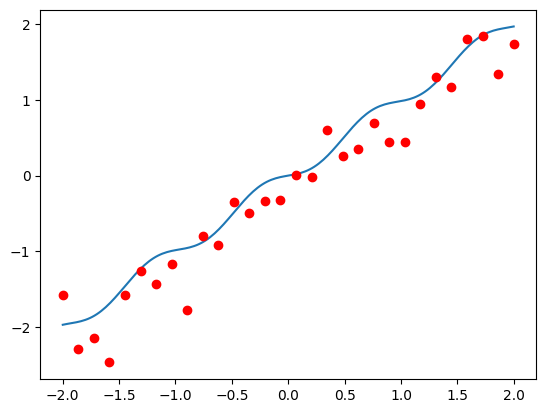

In [ ]:
# 비선형적인 선으로 추정
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine, g(x_fine, a, b))
plt.plot(x, y, 'ro')

# Root Finding

주어진 함수 f(x) 에서 f(x) = 0 이되는 x값을 찾는거임

-1은 시작점

In [ ]:
def f(x):
  return np.sin(x)

optimize.root(f, -1)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 0.000e+00]
  method: hybr
    nfev: 12
    fjac: [[-1.000e+00]]
       r: [-1.000e+00]
     qtf: [-5.740e-42]

# Exercise 6
Linear programming 을 통해 c^T x 값을 최소화하는 x를 찾는것

문제는 원문을 보고 진행




In [ ]:
c = [1, 2]

A_ub = [[1, 0],
        [-5, -1]]

b_ub = [1, 0]

A_eq = 0

b_eq = 0

- fun : 최소화된 c^T * x 값
- x : 최적의 x값
- lower residual : 변수들의 하한
- lower marginals : 변수에 대한 목적함수의 기울기
- upper : 상한은 없음

In [ ]:
from scipy import optimize

result = optimize.linprog(c=c, A_ub = A_ub, b_ub = b_ub)
print(result)

       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00]
                marginals: [ 1.000e+00  2.000e+00]
         upper:  residual: [       inf        inf]
                marginals: [ 0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 1.000e+00  0.000e+00]
                marginals: [-0.000e+00 -0.000e+00]


# Statistics

In [ ]:
from scipy import stats

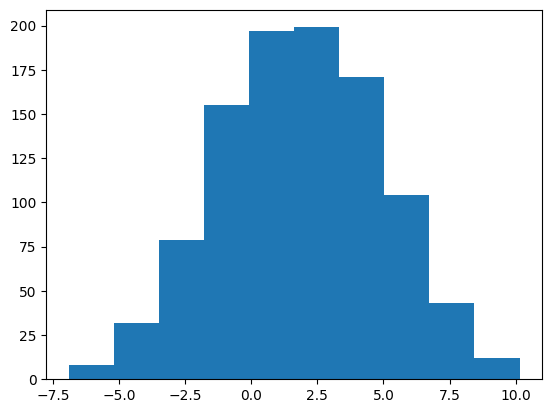

In [ ]:
# 정규분포를 따르는 데이터 생성
samples = 3*np.random.randn(1000)+2
plt.hist(samples);

In [ ]:
# 평균과 표준편차를 추정해줌
# 3을 곱하고 2를 더했으므로 평균 2, 표준편차 3을 기대하게됨
stats.norm.fit(samples)

(np.float64(1.8616569686649755), np.float64(3.0440994658165716))

In [ ]:
# 정규분포 샘플과 약간의 노이즈가 더해진 정규분포 샘플
a = np.random.randn(300)
b = np.random.randn(300) + 0.1

- statistic : t-값 (두 집단의 평균 차이를 표준오차로 나눈 값)
- pvalue : p값 (두 집단 평균 차이가 우연일 확률)
- df : 자유도

In [ ]:
# 두 집단이 통계적으로 유의미 하게 다른지 t-검정을 해봄
stats.ttest_ind(a, b)

TtestResult(statistic=np.float64(-1.374366760722779), pvalue=np.float64(0.16984268170295205), df=np.float64(598.0))

In [ ]:
# 두개의 정규 분포 샘플을 concatenate로 합침
x = np.concatenate(( 2*np.random.randn(1000)+5, 0.6*np.random.randn(1000)-1))

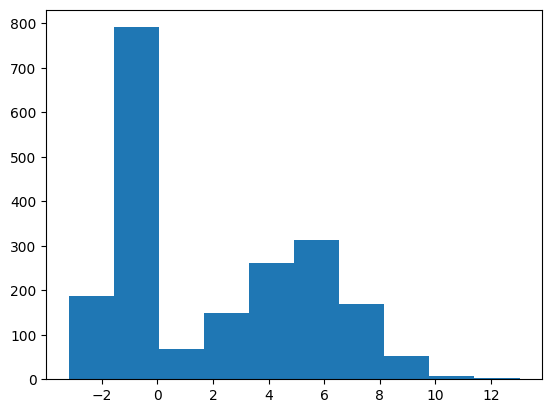

In [ ]:
plt.hist(x);

In [ ]:
# gaussian_kde는 x 데이터의 연속 확률 밀도 함수를 부드럽게 추정
pdf = stats.kde.gaussian_kde(x)
type(pdf)

<ipython-input-66-a04330a1fb6e>:1: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  pdf = stats.kde.gaussian_kde(x)


scipy.stats._kde.gaussian_kde

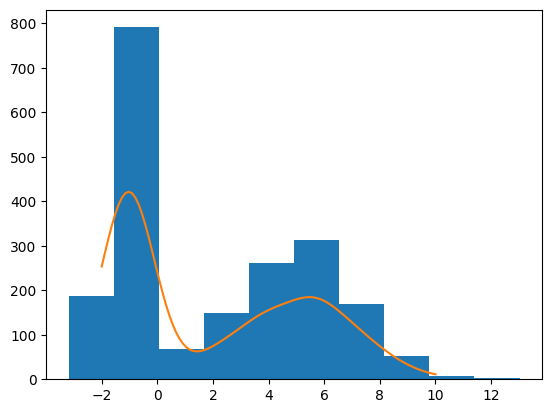

In [ ]:
# 추정한것을 같이 그려보니 마치 두개의 정규분포가 합쳐진것 같은 모습을 띈다.
counts,bins,_ = plt.hist(x)
x_fine = np.linspace(-2, 10, 100)
plt.plot(x_fine, np.sum(counts)*pdf(x_fine))

# Numerical Integration

In [ ]:
import scipy.integrate as integ

In [ ]:
def f(x):
  return x**2 + 5*x + np.sin(x)

In [ ]:
# quad는 f(x)를 -1 부터 1까지 적분해준다.
# 출력 값은 (적분값, 오차 추정치)
integ.quad(f, -1, 1)

(0.6666666666666667, 6.547013372677054e-14)

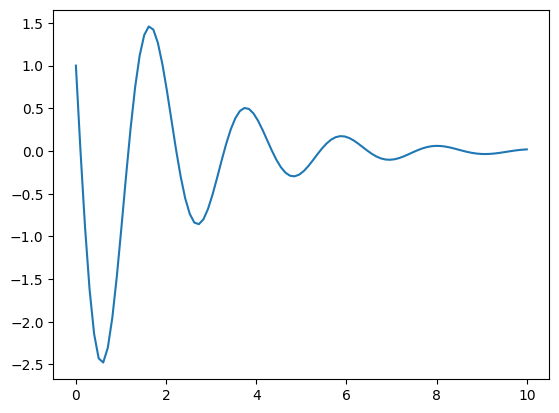

In [ ]:
# 상미분방정식(ODE)
# 시간에 따른 다음 상태가 어떻게 바뀌는지 시뮬레이션 해보는 느낌
# 전상태에 9를 곱해서 빼주기 때문에 계속 줄어들다가 0에 수렵

def f(y, t):
  return (y[1], -y[1]-9*y[0])

t = np.linspace(0,10,100)
Y = integ.odeint(f, [1,1], t)
plt.plot(t, Y[:,1])